In [9]:
%load_ext autoreload
%autoreload 2

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

### Read the csv data

In [11]:
raw_data = pd.read_csv('fish.csv')
raw_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


__Check for number of null values in each column__

In [12]:
print('Number of null values in each column')
raw_data.isnull().sum()

Number of null values in each column


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

__Check for datatypes__

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


* Here there is no preprocessing required, since there are no null values and only required column is of object type

In [17]:
def split_for_validation(a,n):
    '''
    a = dataframe,
    n = percentage of split
    '''
    return a[: len(a) - (int(len(a) * n))].copy(), a[len(a) - (int(len(a) * n)):].copy()    

### Function for random forest classifier with final confusion matrix plot

In [96]:
# function for random forest algorithm classifier

def rand_forest_classifier(raw_data, validation_split):
    feature_columns = raw_data.iloc[:,1:].values
    dependent_column = raw_data.iloc[:,0].values
    X_train, X_valid = split_for_validation(a = feature_columns,
                                            n = validation_split)
    y_train, y_valid = split_for_validation(a = dependent_column,
                                            n = validation_split)
    print('Training data: ', X_train.shape, y_train.shape)
    print('Validation data: ', X_valid.shape, y_valid.shape)

    m = RandomForestClassifier(n_jobs=-1)
    m.fit(X_train, y_train)

    predTree = m.predict(X_valid)
    print()
    print('Training accuracy: ', round((m.score(X_train, y_train))*100,2),'%')
    print()
    print('Validation accuracy: ', round((m.score(X_valid, y_valid))*100,2),'%')
    plt.figure(figsize=(10,9))
    from sklearn.metrics import confusion_matrix

    labels = np.unique(y_valid)
    cm = confusion_matrix(y_valid, predTree, labels = labels)
    print()
    print(cm)
    print()
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    

### Result for Random Forest

Training data:  (128, 6) (128,)
Validation data:  (31, 6) (31,)

Training accuracy:  100.0 %

Validation accuracy:  0.0 %

[[0 0]
 [0 0]]



<Figure size 720x648 with 0 Axes>

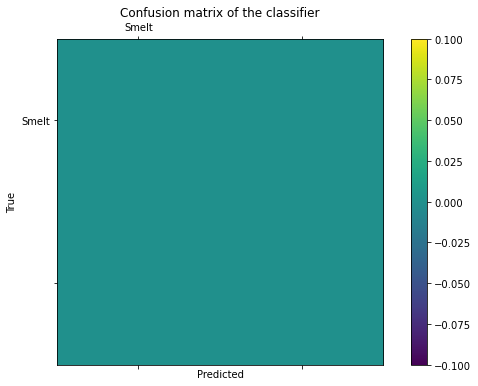

In [108]:
raw_data = pd.read_csv('fish.csv')
rand_forest_classifier(raw_data = raw_data,
                       validation_split = 0.2)

* The validation accuracy is very poor, it is as good as nothing. 
* The reason for such poor performance is the way we have split the data.
* It may have happened that after splitting, since this is split manually, the last 20% of the data is sent to the validation dataset.
* The validation dataset may just have one or two species of fish, however we have trained the model with around 7 species of fish.

In [109]:
validation_split = 0.2
feature_columns = raw_data.iloc[:,1:].values
dependent_column = raw_data.iloc[:,0].values
X_train, X_valid = split_for_validation(a = feature_columns,
                                        n = validation_split)
y_train, y_valid = split_for_validation(a = dependent_column,
                                        n = validation_split)
print(y_train)
print()
print(y_valid)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

### Improving the accuracy of model

* It is observed that training dataset has around 7 species of fishes, and validation dataset has only 2 species of fishes.
* Hence to overcome this, we will shuffle the dataframe, so that we will have random 20% of the data as validation of dataset

Training data:  (128, 6) (128,)
Validation data:  (31, 6) (31,)

Training accuracy:  100.0 %

Validation accuracy:  80.65 %

[[ 8  0  0  0  0]
 [ 0 10  0  1  0]
 [ 0  1  4  0  0]
 [ 0  4  0  0  0]
 [ 0  0  0  0  3]]



<Figure size 720x648 with 0 Axes>

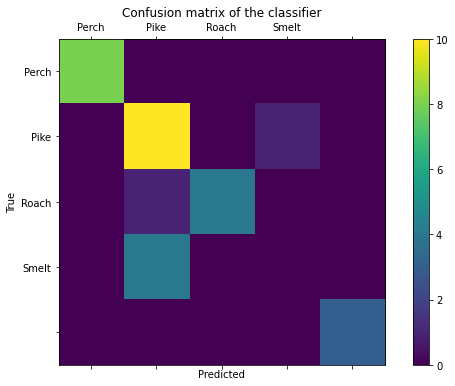

In [111]:
raw_data = shuffle(raw_data)
rand_forest_classifier(raw_data = raw_data,
                       validation_split = 0.2)

### Function for logistic regression

In [112]:
def log_regression(raw_data, validation_split):
    feature_columns = raw_data.iloc[:,1:].values
    dependent_column = raw_data.iloc[:,0].values
    X_train, X_valid = split_for_validation(a = feature_columns,
                                            n = validation_split)
    y_train, y_valid = split_for_validation(a = dependent_column,
                                            n = validation_split)
    print('Training data: ', X_train.shape, y_train.shape)
    print('Validation data: ', X_valid.shape, y_valid.shape)


    model = LogisticRegression()
    model.fit(X_train, y_train)
    predTree = model.predict(X_valid)
    print('Training accuracy: ', round((model.score(X_train, y_train))*100,2),'%')
    print()
    print('Validation accuracy: ', round((model.score(X_valid, y_valid))*100,2),'%')   
    
    from sklearn.metrics import confusion_matrix

    labels = np.unique(y_valid)
    cm = confusion_matrix(y_valid, predTree, labels = labels)
    print()
    print(cm)
    print()
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Training data:  (128, 6) (128,)
Validation data:  (31, 6) (31,)
Training accuracy:  90.62 %

Validation accuracy:  0.0 %

[[0 0]
 [0 0]]



C:\Users\Arjun Janamatti\Anaconda3\envs\abcd\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


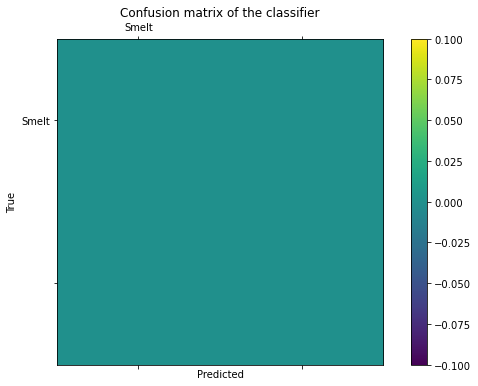

In [113]:
raw_data = pd.read_csv('fish.csv')
log_regression(raw_data = raw_data,
                       validation_split = 0.2)


Training data:  (128, 6) (128,)
Validation data:  (31, 6) (31,)
Training accuracy:  77.34 %

Validation accuracy:  87.1 %

[[ 9  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0 11  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  2  0  3  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  1  0  0  0  0]]



C:\Users\Arjun Janamatti\Anaconda3\envs\abcd\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


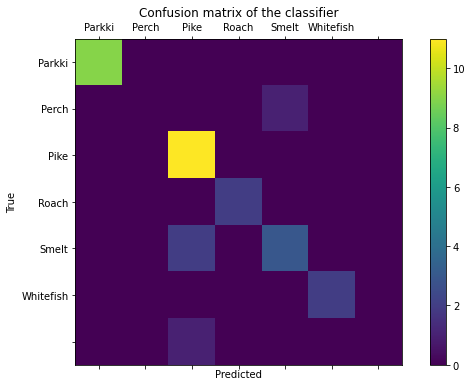

In [114]:
raw_data = shuffle(raw_data)
log_regression(raw_data = raw_data,
                       validation_split = 0.2)

* Here one can observe that logistic regression has higher validation accuracy when compared to the training accuracy, this may prove that there is less chance of overfitting in logistic regression in small amount of data
*